# Project Title



---


**Online News Popularity**


---



# Group Members



*   **Alishba Kamran 21L-6297**
*   **Anas Tanvir 21L-5678**
*   **Usman Bin Imran 21L-7963**






# Data Loading


## Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [ ]:
# Load the dataset
df = pd.read_csv('OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
print(df.columns)


Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [ ]:
for column in df.columns:
    print(repr(column))


'url'
' timedelta'
' n_tokens_title'
' n_tokens_content'
' n_unique_tokens'
' n_non_stop_words'
' n_non_stop_unique_tokens'
' num_hrefs'
' num_self_hrefs'
' num_imgs'
' num_videos'
' average_token_length'
' num_keywords'
' data_channel_is_lifestyle'
' data_channel_is_entertainment'
' data_channel_is_bus'
' data_channel_is_socmed'
' data_channel_is_tech'
' data_channel_is_world'
' kw_min_min'
' kw_max_min'
' kw_avg_min'
' kw_min_max'
' kw_max_max'
' kw_avg_max'
' kw_min_avg'
' kw_max_avg'
' kw_avg_avg'
' self_reference_min_shares'
' self_reference_max_shares'
' self_reference_avg_sharess'
' weekday_is_monday'
' weekday_is_tuesday'
' weekday_is_wednesday'
' weekday_is_thursday'
' weekday_is_friday'
' weekday_is_saturday'
' weekday_is_sunday'
' is_weekend'
' LDA_00'
' LDA_01'
' LDA_02'
' LDA_03'
' LDA_04'
' global_subjectivity'
' global_sentiment_polarity'
' global_rate_positive_words'
' global_rate_negative_words'
' rate_positive_words'
' rate_negative_words'
' avg_positive_polarity'
' m

In [ ]:
# Clean column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

# Data Visualizations

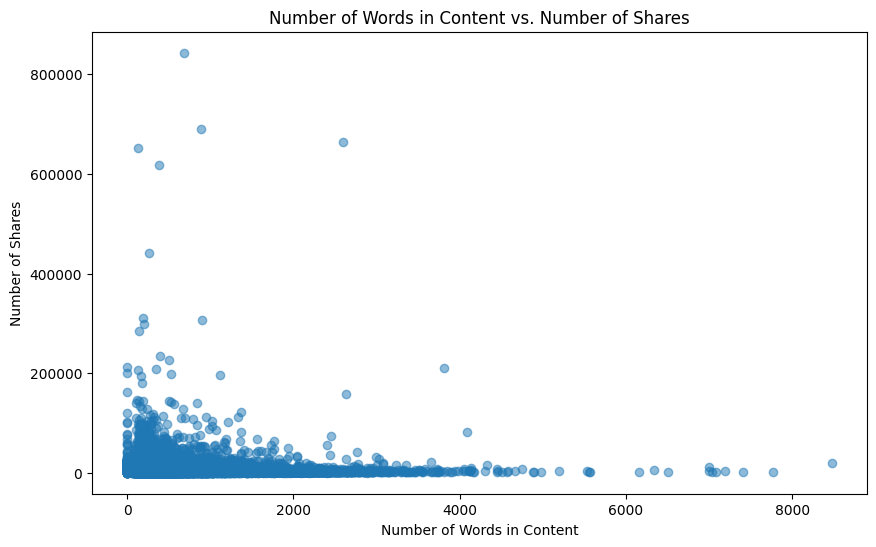

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['n_tokens_content'], df['shares'], alpha=0.5)
plt.title('Number of Words in Content vs. Number of Shares')
plt.xlabel('Number of Words in Content')
plt.ylabel('Number of Shares')
plt.show()


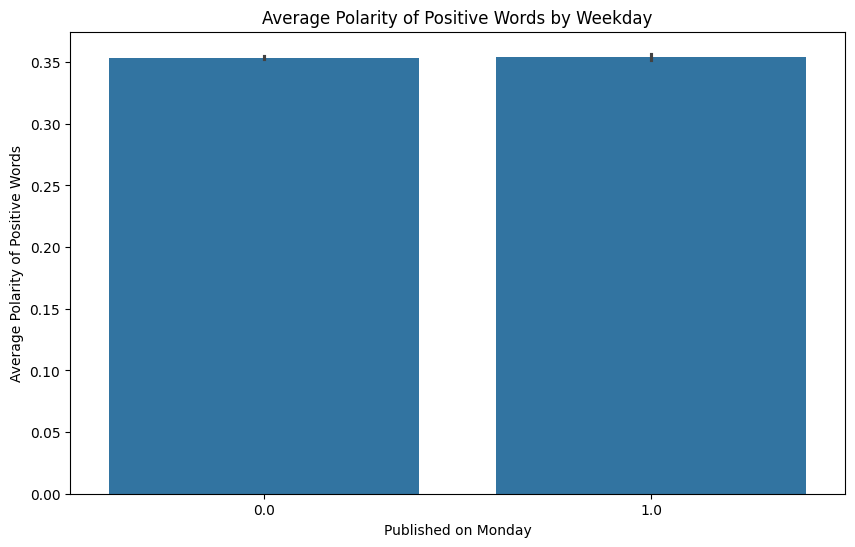

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='weekday_is_monday', y='avg_positive_polarity', data=df)
plt.title('Average Polarity of Positive Words by Weekday')
plt.xlabel('Published on Monday')
plt.ylabel('Average Polarity of Positive Words')
plt.show()


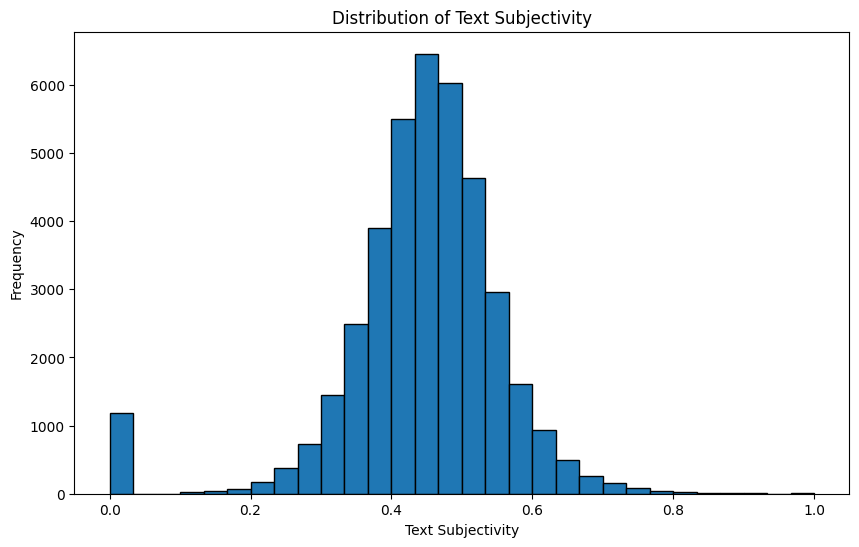

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['global_subjectivity'], bins=30, edgecolor='black')
plt.title('Distribution of Text Subjectivity')
plt.xlabel('Text Subjectivity')
plt.ylabel('Frequency')
plt.show()


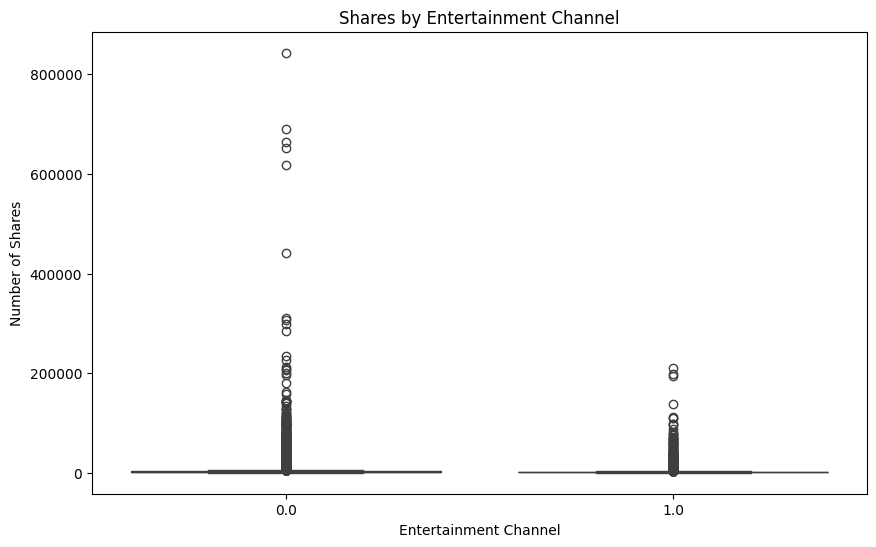

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='data_channel_is_entertainment', y='shares', data=df)
plt.title('Shares by Entertainment Channel')
plt.xlabel('Entertainment Channel')
plt.ylabel('Number of Shares')
plt.show()


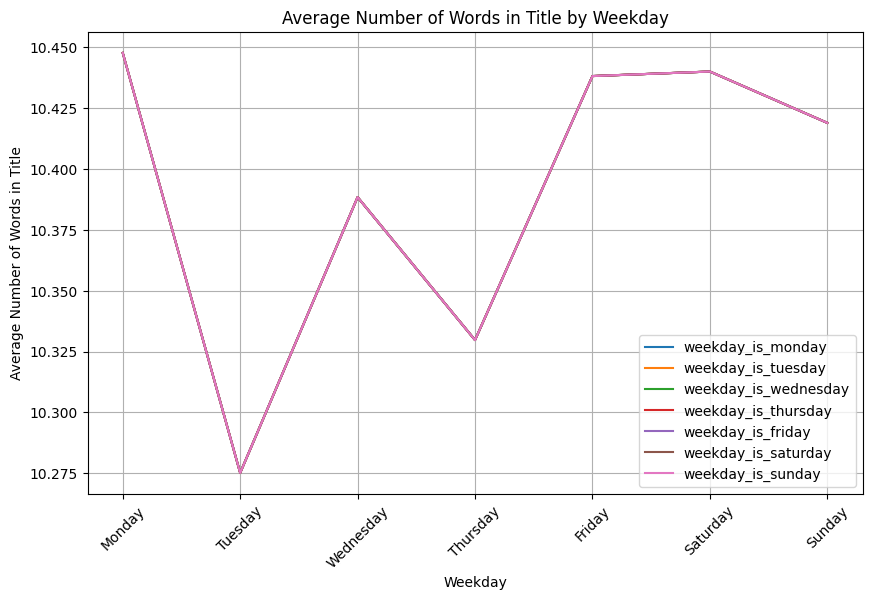

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculating the average number of words in the title for each weekday
weekday_columns = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
                   'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
                   'weekday_is_sunday']

# Selecting relevant columns for the analysis
data = df[['n_tokens_title'] + weekday_columns]

# Calculate average number of words in the title for each weekday
average_tokens_by_weekday = data.groupby(weekday_columns).mean().reset_index()
average_tokens_by_weekday['weekday'] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                        'Friday', 'Saturday', 'Sunday']

# Plotting the line chart
plt.figure(figsize=(10, 6))
for i, weekday in enumerate(weekday_columns):
    plt.plot(average_tokens_by_weekday['weekday'], average_tokens_by_weekday['n_tokens_title'], label=weekday)

plt.title('Average Number of Words in Title by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Number of Words in Title')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


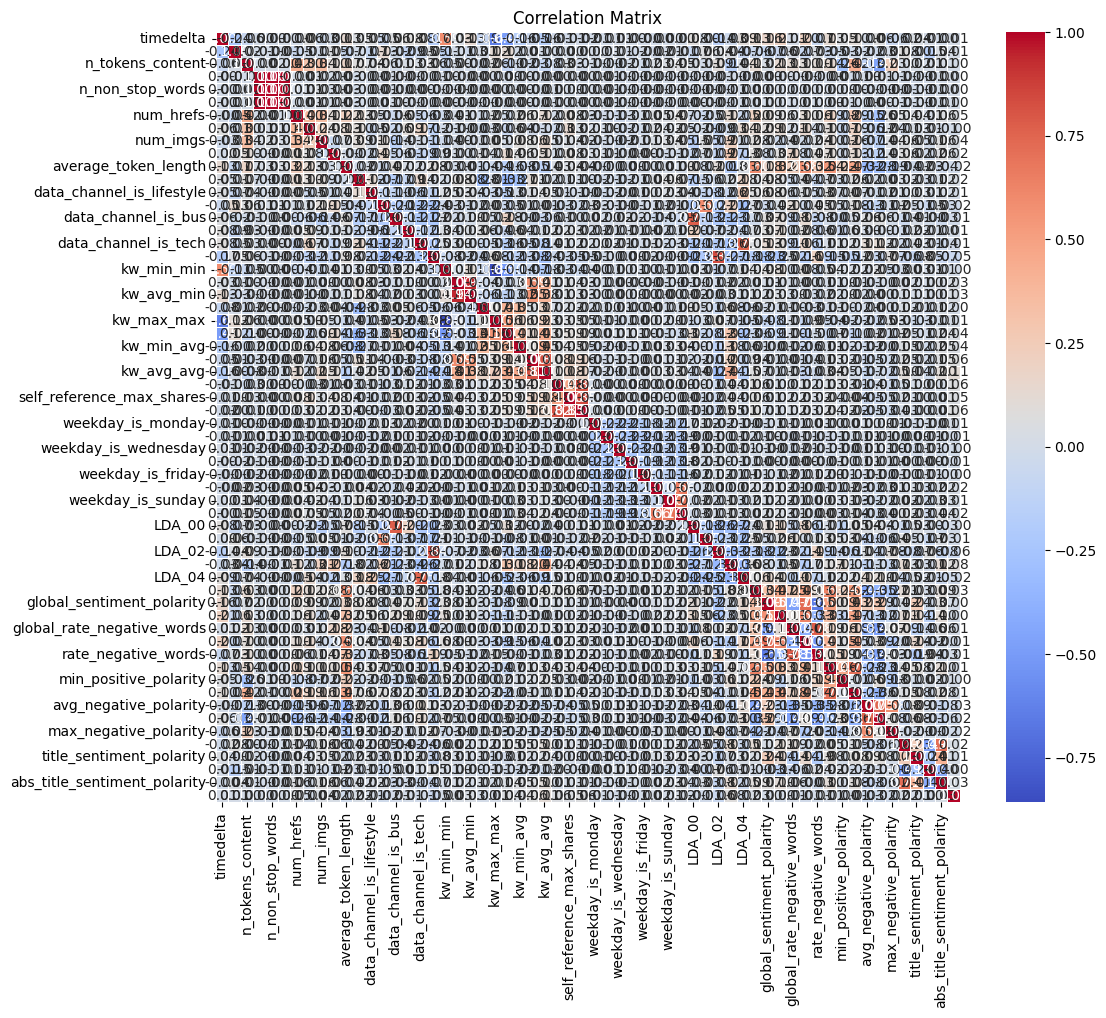

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

# Computing correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing

## Handling Missing Vlues

In [ ]:
# Defining numerical columns
numerical_columns = [col for col in df.columns if col not in ['url', 'timedelta', 'shares']]

# Handle missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

## Standard Scaling

In [ ]:
# Standardize numerical columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

## One-Hot Encoding

In [ ]:
# Define categorical columns for one-hot encoding
categorical_columns = [
    'data_channel_is_lifestyle',
    'data_channel_is_entertainment',
    'data_channel_is_bus',
    'data_channel_is_socmed',
    'data_channel_is_tech',
    'data_channel_is_world',
    'weekday_is_monday',
    'weekday_is_tuesday',
    'weekday_is_wednesday',
    'weekday_is_thursday',
    'weekday_is_friday',
    'weekday_is_saturday',
    'weekday_is_sunday',
    'is_weekend'
]

# Check if all categorical columns exist in the DataFrame
missing_columns = [col for col in categorical_columns if col not in df.columns]
if missing_columns:
    print(f"Error: The following categorical columns are missing in the DataFrame: {missing_columns}")
else:
    # One-hot encode categorical columns in the original DataFrame
    encoder = OneHotEncoder(drop='first')

    # Fit and transform the categorical columns
    encoded_features = encoder.fit_transform(df[categorical_columns])

    # Convert the sparse matrix to a dense array
    encoded_features_dense = encoded_features.toarray()

    # Create a DataFrame with the encoded features
    encoded_df = pd.DataFrame(encoded_features_dense, columns=encoder.get_feature_names_out(categorical_columns))

    # Replace original categorical columns with encoded columns in the DataFrame
    df.drop(columns=categorical_columns, inplace=True)
    df = pd.concat([df, encoded_df], axis=1)

    print("One-hot encoding completed successfully!")

# Now df contains all numerical and one-hot encoded categorical features
print(df.head())


One-hot encoding completed successfully!
                                                 url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0        0.757447         -0.695210         0.032772          0.000675   
1       -0.661657         -0.618794         0.016056          0.000675   
2       -0.661657         -0.712192         0.007645          0.000675   
3       -0.661657         -0.032933        -0.012619          0.000675   
4        1.230482          1.115439        -0.037655          0.000675   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  0.038658  -0.607463

# Feature Extraction

## Correlation based Feature Selection

In [ ]:
# Check correlation matrix
df.drop(columns='url', inplace=True)
correlation_matrix = df.corr()

# Visualize correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize=(12, 10))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.show()

# Option: Remove highly correlated features
threshold = 0.8  # Define correlation threshold
corr_pairs = correlation_matrix.unstack()
high_corr = corr_pairs[((corr_pairs > threshold) | (corr_pairs < -threshold)) & (corr_pairs != 1)]
print("Highly correlated pairs:\n", high_corr)


Highly correlated pairs:
 n_unique_tokens                         n_non_stop_words                          0.999572
                                        n_non_stop_unique_tokens                  0.999852
n_non_stop_words                        n_unique_tokens                           0.999572
                                        n_non_stop_unique_tokens                  0.999532
n_non_stop_unique_tokens                n_unique_tokens                           0.999852
                                        n_non_stop_words                          0.999532
kw_min_min                              kw_max_max                               -0.857226
kw_max_min                              kw_avg_min                                0.940529
kw_avg_min                              kw_max_min                                0.940529
kw_max_max                              kw_min_min                               -0.857226
kw_max_avg                              kw_avg_avg              

In [ ]:
import pandas as pd

# Calculate correlation of all features with the target column "shares"
correlation_matrix = df.corr()
correlation_with_shares = correlation_matrix['shares'].abs().sort_values(ascending=False)

# Retain top 20 highly correlated features (excluding the target itself)
top_20_features = correlation_with_shares.drop('shares').nlargest(20)

# Get the names of the top 20 features
top_20_feature_names = top_20_features.index.tolist()

# Include 'shares' column in the top feature names
top_20_feature_names.append('shares')

# Filter the DataFrame to retain only the top 20 features
df = df[top_20_feature_names]

# Display the top 20 feature names and their correlation values
print("Top 20 Highly Correlated Features with 'shares':")
print(top_20_features)


Top 20 Highly Correlated Features with 'shares':
kw_avg_avg                                0.110413
LDA_03                                    0.083771
kw_max_avg                                0.064306
LDA_02                                    0.059163
self_reference_avg_sharess                0.057789
self_reference_min_shares                 0.055958
data_channel_is_world_1.92468244542399    0.049497
self_reference_max_shares                 0.047115
num_hrefs                                 0.045404
kw_avg_max                                0.044686
kw_min_avg                                0.039551
num_imgs                                  0.039388
avg_negative_polarity                     0.032029
global_subjectivity                       0.031604
kw_avg_min                                0.030406
kw_max_min                                0.030114
abs_title_sentiment_polarity              0.027135
num_videos                                0.023936
average_token_length             

In [ ]:
print("DataFrame with Only Top 20 Features:")
df.head()

DataFrame with Only Top 20 Features:


,kw_avg_avg,LDA_03,kw_max_avg,LDA_02,self_reference_avg_sharess,self_reference_min_shares,data_channel_is_world_1.92468244542399,self_reference_max_shares,num_hrefs,kw_avg_max,...,num_imgs,avg_negative_polarity,global_subjectivity,kw_avg_min,kw_max_min,abs_title_sentiment_polarity,num_videos,average_token_length,title_subjectivity,shares
0,-2.379014,-0.618276,-0.927595,-0.624921,-0.243926,-0.177459,0.0,-0.239676,-0.607463,-1.919178,...,-0.426526,-0.708369,0.670593,-0.503188,-0.299111,0.138920,-0.304268,0.156474,0.671245,593
1,-2.379014,-0.588335,-0.927595,-0.589153,-0.264412,-0.202587,0.0,-0.251766,-0.695709,-1.919178,...,-0.426526,1.102174,-0.875228,-0.503188,-0.299111,-0.689658,-0.304268,0.432838,-0.870807,711
2,-2.379014,-0.645137,-0.927595,-0.648502,-0.226496,-0.156079,0.0,-0.229390,-0.695709,-1.919178,...,-0.426526,-1.621797,2.218418,-0.503188,-0.299111,-0.689658,-0.304268,-0.183415,-0.870807,1500
3,-2.379014,-0.660140,-0.927595,0.986490,-0.264412,-0.202587,0.0,-0.251766,-0.166229,-1.919178,...,-0.426526,-0.862584,-0.115874,-0.503188,-0.299111,-0.689658,-0.304268,-0.169758,-0.870807,1200
4,-2.379014,-0.661269,-0.927595,-0.665431,-0.134259,-0.174976,0.0,0.138221,0.716237,-1.919178,...,1.860061,0.307944,0.601046,-0.503188,-0.299111,-0.087056,-0.304268,0.159400,0.531059,505


## Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
df = df.sample(3000)

X = df.drop(columns=['shares'])
y = df['shares']
# Initialize PCA and specify number of components
pca = PCA(n_components=10)

# Fit PCA to data
X_pca = pca.fit_transform(X)


## Forward Selection

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
selected_features = X.columns[lasso.coef_ != 0]

df = df[selected_features.union(['shares'])]


In [ ]:
df.head()

,LDA_02,LDA_03,abs_title_sentiment_polarity,average_token_length,avg_negative_polarity,data_channel_is_world_1.92468244542399,global_subjectivity,kw_avg_avg,kw_avg_max,kw_avg_min,...,kw_max_min,kw_min_avg,num_hrefs,num_imgs,num_videos,self_reference_avg_sharess,self_reference_max_shares,self_reference_min_shares,shares,title_subjectivity
33238,-0.672591,-0.673364,0.157333,0.222055,0.462647,0.0,0.395500,0.153691,0.520209,-0.274212,...,-0.105225,-0.982156,-0.077983,-0.306179,0.182610,-0.136372,-0.176206,-0.045533,2600,0.439938
33030,-0.677852,1.442792,-0.689658,-5.386389,2.031912,0.0,-3.799778,0.644349,0.770949,-0.148793,...,-0.113779,0.918022,-0.960449,-0.546872,-0.060829,-0.264412,-0.251766,-0.202587,776,-0.870807
7844,0.482653,-0.644586,-0.087056,0.188920,0.781387,0.0,0.465400,0.176220,0.718117,-0.121139,...,-0.183764,1.199510,-0.695709,-0.426526,-0.304268,-0.167349,-0.188393,-0.096196,1400,0.531059
95,-0.624937,-0.621276,-0.689658,0.358106,1.009743,0.0,0.641152,-1.735158,-1.885129,0.252855,...,-0.144106,-0.982156,-0.519216,-0.426526,-0.304268,-0.153237,-0.144520,-0.178523,6400,-0.870807
26431,1.798747,-0.690297,-0.087056,0.476099,0.264865,1.0,-0.624272,-0.857576,-0.159525,-0.242224,...,-0.195947,-0.982156,-0.077983,-0.185832,-0.304268,-0.212091,-0.217642,-0.158663,527,0.531059


# Class Imbalance

Class Distribution:
shares
1100      173
1200      156
1300      141
1400      110
1500       92
         ... 
800         1
22600       1
758         1
877         1
193400      1
Name: count, Length: 660, dtype: int64


C:\Users\Afnan Hussain\AppData\Local\Temp\ipykernel_16264\3448064741.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


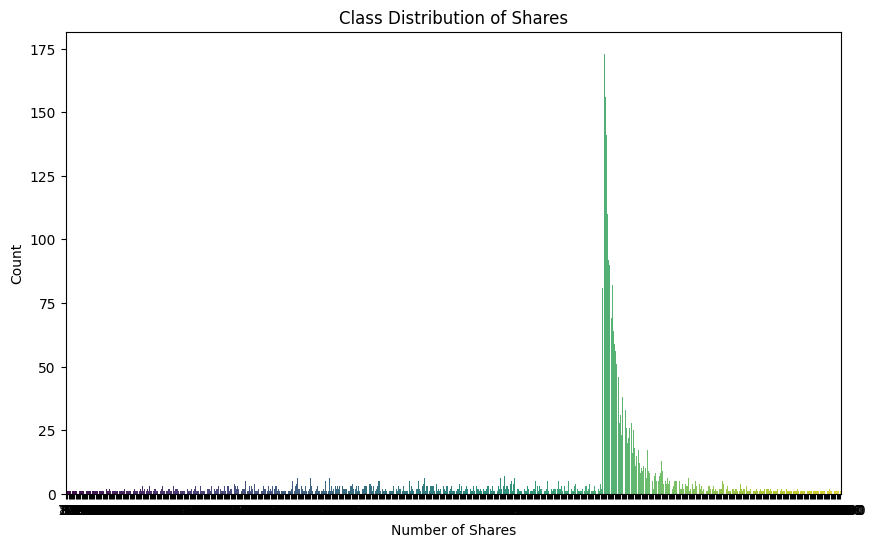


Class Proportions:
shares
1100      0.057667
1200      0.052000
1300      0.047000
1400      0.036667
1500      0.030667
            ...   
800       0.000333
22600     0.000333
758       0.000333
877       0.000333
193400    0.000333
Name: count, Length: 660, dtype: float64

Imbalance Ratio: 173.00


In [ ]:
class_counts = df['shares'].value_counts()
total_samples = df.shape[0]

# Calculate class proportions
class_proportions = class_counts / total_samples

# Print class distribution
print("Class Distribution:")
print(class_counts)

# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution of Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Count')
plt.show()

# Print class proportions
print("\nClass Proportions:")
print(class_proportions)

# Calculate imbalance ratio (optional)
imbalance_ratio = class_proportions.max() / class_proportions.min()
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}")

In [ ]:
# to address class imbalance and multicollinearity we will use RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
X = df.drop(columns=['shares'])
y = df['shares']

In [ ]:
df

,LDA_02,LDA_03,abs_title_sentiment_polarity,average_token_length,avg_negative_polarity,data_channel_is_world_1.92468244542399,global_subjectivity,kw_avg_avg,kw_avg_max,kw_avg_min,...,kw_max_min,kw_min_avg,num_hrefs,num_imgs,num_videos,self_reference_avg_sharess,self_reference_max_shares,self_reference_min_shares,shares,title_subjectivity
33238,-0.672591,-0.673364,0.157333,0.222055,0.462647,0.0,0.395500,0.153691,0.520209,-0.274212,...,-0.105225,-0.982156,-0.077983,-0.306179,0.182610,-0.136372,-0.176206,-0.045533,2600,0.439938
33030,-0.677852,1.442792,-0.689658,-5.386389,2.031912,0.0,-3.799778,0.644349,0.770949,-0.148793,...,-0.113779,0.918022,-0.960449,-0.546872,-0.060829,-0.264412,-0.251766,-0.202587,776,-0.870807
7844,0.482653,-0.644586,-0.087056,0.188920,0.781387,0.0,0.465400,0.176220,0.718117,-0.121139,...,-0.183764,1.199510,-0.695709,-0.426526,-0.304268,-0.167349,-0.188393,-0.096196,1400,0.531059
95,-0.624937,-0.621276,-0.689658,0.358106,1.009743,0.0,0.641152,-1.735158,-1.885129,0.252855,...,-0.144106,-0.982156,-0.519216,-0.426526,-0.304268,-0.153237,-0.144520,-0.178523,6400,-0.870807
26431,1.798747,-0.690297,-0.087056,0.476099,0.264865,1.0,-0.624272,-0.857576,-0.159525,-0.242224,...,-0.195947,-0.982156,-0.077983,-0.185832,-0.304268,-0.212091,-0.217642,-0.158663,527,0.531059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29368,-0.677909,0.679178,0.415112,-0.355368,-0.208996,0.0,1.014396,1.134691,-0.176864,-0.345522,...,-0.181431,1.993869,2.039937,2.221101,-0.304268,-0.086807,-0.146957,0.015262,1100,1.750682
19748,0.147184,1.340767,-0.689658,0.037727,-0.781421,0.0,0.044605,0.226643,0.528333,-0.287007,...,-0.200613,0.826034,-0.519216,5.590807,-0.304268,0.182973,0.262529,-0.162311,7100,-0.870807
11571,-0.624938,-0.622553,-0.689658,0.119157,1.053240,0.0,-0.090707,-0.004244,2.399384,-0.160713,...,-0.157066,0.109063,-0.783956,-0.426526,-0.304268,-0.264412,-0.251766,-0.202587,715,-0.870807
11409,-0.226307,1.019643,-0.689658,0.400854,-2.560079,0.0,1.849282,0.243804,-0.143185,0.293051,...,0.297062,-0.982156,-0.342723,-0.426526,-0.304268,0.371661,0.123596,0.577617,9300,-0.870807


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import OneClassSVM

# Step 1: Identify the minority class
class_frequencies = y_train.value_counts()
minority_class = class_frequencies.idxmin()  # Get the label of the minority class

# Step 2: Use the minority class in your code
ocsvm = OneClassSVM()
ocsvm.fit(X_train[y_train == minority_class])  # Fit the model using only the minority class data
y_pred = ocsvm.predict(X_test)  # Make predictions on the test data

In [ ]:
print(minority_class)

613


In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier

bbc = BalancedBaggingClassifier(random_state=42)
bbc.fit(X_train, y_train)
y_pred = bbc.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Balanced Bagging Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Balanced Bagging Classifier Performance:
Accuracy: 0.0000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


In [ ]:
print(y.unique())

[  2600    776   1400   6400    527    623    831   1200   2100   1800
   9500    778    587  12400   1900    369   1100   1500   2300    945
    847    901   3400   4000   5800   1300    970   1000    673   2800
   4900  13200   4400    765   9200   3200   1600    815    929    138
    987    833    675   3000   1700  16700    627   2400  11800   5000
   3100    704    753    874  71000    752  10800    749    827    976
    525   8700  27000   4600    890   2900  12600  25700    626   2000
    715    645   7800    853    407    710   3300  11200    828   4200
    802  16600   4300    872   6100   8200    920    646    498    545
  42600    788    606    972    515    608    296    953   2700    553
  21800  17100    642   3600    700  23000    884   5600   8100    836
    489    946    622    403    790    938    755   3700    767  11000
    310   6800    990   9000  12700    971    647    220   5900    658
    467    613    588    998   5400   5700   3800    862   7000   2500
  1390

# Cross validation and Grid Search for Hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Define models
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression()
}

# Define parameter grids for each model
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 5, 10]
    },
    'LogisticRegression': {
        'C': [0.1, 1.0, 10.0],
        'penalty': ['l1', 'l2']
    }
}

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform grid search CV for each model
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Evaluate the best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Print results
    print(f"Best {model_name} Model:")
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score (Accuracy):", grid_search.best_score_)
    print("Test Accuracy:", accuracy)
    print()


C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best RandomForest Model:
Best Parameters: {'max_depth': 5, 'n_estimators': 100}
Best Score (Accuracy): 0.058750000000000004
Test Accuracy: 0.051666666666666666



C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Afnan Hussain\.conda\envs\t

Best LogisticRegression Model:
Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Score (Accuracy): 0.05708333333333333
Test Accuracy: 0.051666666666666666



# Applying Models

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
import warnings
import lime

In [ ]:
from sklearn.preprocessing import LabelEncoder

unique_values = y_train_resampled.unique()
print("Unique Values of y_train_resampled:", unique_values)

# Creating a LabelEncoder to transform large integers to class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_resampled)

# Now y_train_encoded should contain integer class labels
unique_encoded_values = pd.Series(y_train_encoded).unique()
print("Unique Values of y_train_encoded:", unique_encoded_values)

Unique Values of y_train_resampled: [  3600    778   1100   1900   4800   1200    961   2400 122800    908
    915   9100    602    827   8000    964   2300    836   2100  15000
   6700   1600    615    936    921    701    941   2700    854  16300
   3000   6900    828   3800   5500    820   3700    822   4000    913
  13300   1700   2000   3400    735    955   1300 193400    838   1400
    711   4500    699    814   1500    875   6400   1800   3100   2500
    436    718    578   1000    625    932   3900    626   8500   6000
   9700    792    787   2200    911    959    279   3300   6200    428
    537   6800   6500   4900    268  10900   7200  15400   2900    696
    819  10700    998    703    695   3200  35900    649  14800  29600
    951    894    991    862    492    808   2600  22200  10000    946
    782    704   8400    791   3500  16000    907   6300    846   5000
   5200    715   5900  25000    709   5100   9500   4100  33300   7000
    663    231    655    753    573    56

## Random Forest Classifier

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Instantiate and train the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
with tf.device(device_name):
    rf_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')


# Display evaluation metrics
print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")



Random Forest Classifier Performance:
Accuracy: 0.0183
Precision: 0.0207
Recall: 0.0183
F1 Score: 0.0185


C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### With Explainable AI

In [ ]:
X_test.shape

(600, 20)

In [ ]:
shap_values_rf.shape

(600, 20, 595)

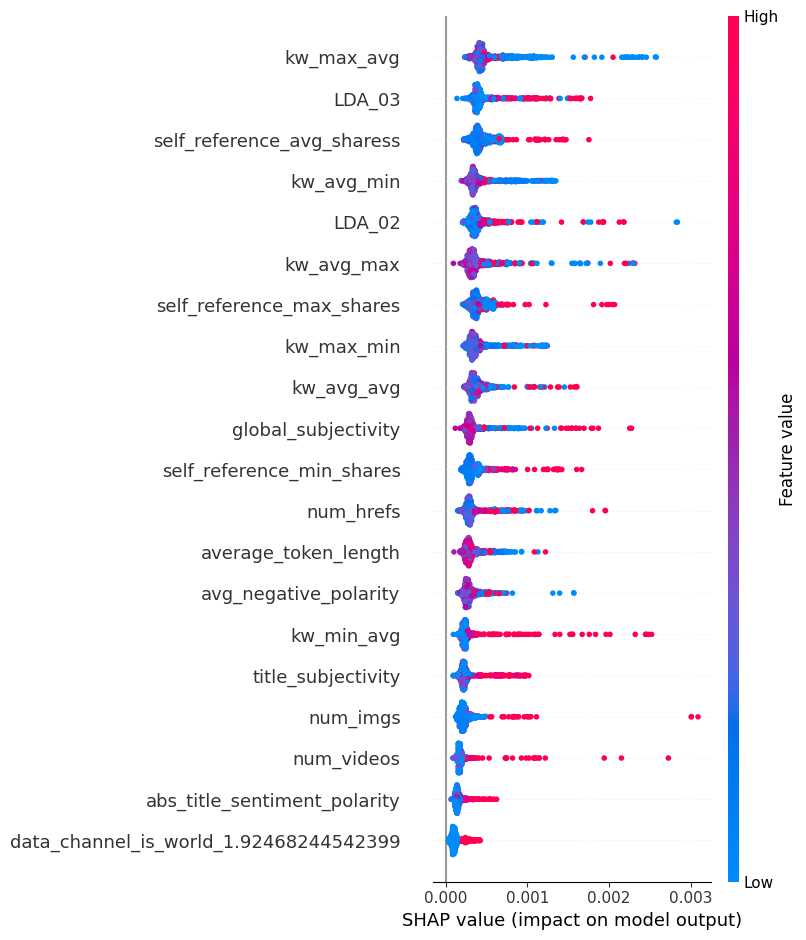

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import shap

# SHAP explanation
explainer_shap_rf = shap.TreeExplainer(rf_clf)
shap_values_rf = explainer_shap_rf.shap_values(X_test)
shap_values_rf_summary = np.mean(np.abs(shap_values_rf), axis=2)
shap.summary_plot(shap_values_rf_summary, X_test)


## Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Instantiate and train the AdaBoost Classifier with adjusted parameters
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)  # Example: Increase n_estimators
ada_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_ada = ada_clf.predict(X_test)

# Evaluate the model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average='weighted', zero_division=0)
recall_ada = recall_score(y_test, y_pred_ada, average='weighted', zero_division=0)
f1_ada = f1_score(y_test, y_pred_ada, average='weighted', zero_division=0)
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)

# Display evaluation metrics and confusion matrix
print("AdaBoost Classifier Performance:")
print(f"Accuracy: {accuracy_ada:.4f}")
print(f"Precision: {precision_ada:.4f}")
print(f"Recall: {recall_ada:.4f}")
print(f"F1 Score: {f1_ada:.4f}")
print("Confusion Matrix:")
print(conf_matrix_ada)


C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier Performance:
Accuracy: 0.0417
Precision: 0.0017
Recall: 0.0417
F1 Score: 0.0033
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Evaluate the model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average='weighted', zero_division=0)  # Set zero_division=0 to avoid warnings
recall_ada = recall_score(y_test, y_pred_ada, average='weighted', zero_division=0)
f1_ada = f1_score(y_test, y_pred_ada, average='weighted', zero_division=0)

# Calculate ROC AUC Score (binary mode for each class vs. rest)
#roc_auc_ada = roc_auc_score(y_test, ada_clf.decision_function(X_test), average='macro', multi_class='ovr')

# Display evaluation metrics
print("AdaBoost Classifier Performance:")
print(f"Accuracy: {accuracy_ada:.4f}")
print(f"Precision: {precision_ada:.4f}")
print(f"Recall: {recall_ada:.4f}")
print(f"F1 Score: {f1_ada:.4f}")
#print(f"ROC AUC Score: {roc_auc_ada:.4f}")

AdaBoost Classifier Performance:
Accuracy: 0.0417
Precision: 0.0017
Recall: 0.0417
F1 Score: 0.0033


### With Explainable AI

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost Classifier model
model_ada = AdaBoostClassifier()
model_ada.fit(X_train, y_train)

# SHAP explanation
explainer_shap_ada = shap.TreeExplainer(model_ada)
shap_values_ada = explainer_shap_ada.shap_values(X_test)
shap.summary_plot(shap_values_ada, X_test)


## XGBoost Classifier

In [ ]:
import numpy as np

# Print unique values of y_train_resampled
unique_values = np.unique(y_train_resampled)
print("Unique Values of y_train_resampled:", unique_values)

# Check data type of y_train_resampled
print("Data Type of y_train_resampled:", y_train_resampled.dtype)

Unique Values of y_train_resampled: [    70     85     93     97    106    128    138    144    150    217
    231    233    255    268    279    280    282    296    306    310
    330    354    360    368    369    371    374    378    401    405
    407    412    413    415    422    424    426    428    429    431
    436    437    444    445    447    448    451    455    458    459
    467    472    473    477    478    479    483    489    492    495
    497    498    500    502    505    507    510    513    515    517
    518    520    524    525    526    527    529    531    535    536
    537    542    545    546    548    549    552    553    554    559
    561    565    573    575    577    578    579    580    581    582
    583    584    587    588    590    591    594    595    596    598
    599    602    604    606    610    612    613    614    615    616
    618    619    621    622    623    624    625    626    627    628
    630    633    634    635    637    63

In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost Classifier model
model_xgb = XGBClassifier()
model_xgb.fit(X_train_resampled, y_train_resampled)

# LIME explanation
explainer_xgb = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns)
exp_xgb = explainer_xgb.explain_instance(X_test.iloc[0], model_xgb.predict_proba, num_features=5)

# SHAP explanation
explainer_shap_xgb = shap.TreeExplainer(model_xgb)
shap_values_xgb_summary = np.mean(np.abs(shap_values_rf), axis=2)
shap.summary_plot(shap_values_xgb_summary, X_test)


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Instantiate and train the Logistic Regression model
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_clf.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
#roc_auc_lr = roc_auc_score(y_test, y_pred_lr, average='weighted', multi_class='ovr')

# Display evaluation metrics
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
#print(f"ROC AUC Score: {roc_auc_lr:.4f}")


Logistic Regression Performance:
Accuracy: 0.0383
Precision: 0.0116
Recall: 0.0383
F1 Score: 0.0159


C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### With Explainable AI

C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labe

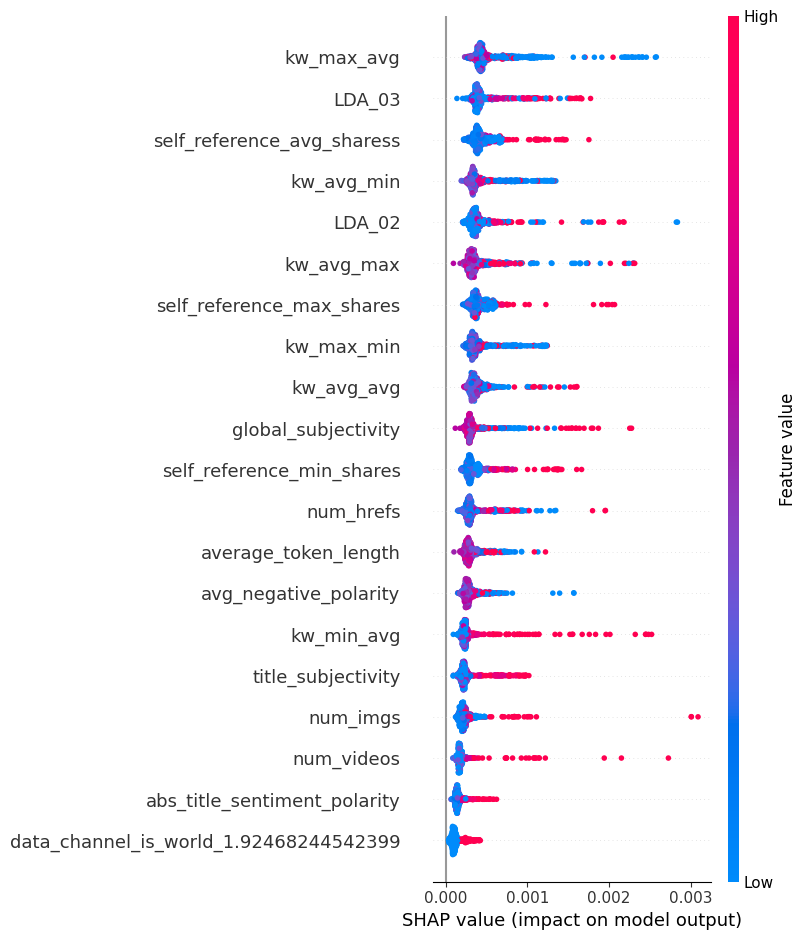

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)

# LIME explanation
explainer_logreg = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns)
exp_logreg = explainer_logreg.explain_instance(X_test.iloc[0], model_logreg.predict_proba, num_features=5)

# SHAP explanation
explainer_shap_logreg = shap.LinearExplainer(model_logreg, X_train)
shap_values_logreg = np.mean(np.abs(shap_values_rf), axis=2)
shap.summary_plot(shap_values_logreg, X_test)


## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Instantiate and train the SVM model
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Display evaluation metrics
print("SVM Classifier Performance:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")


SVM Classifier Performance:
Accuracy: 0.0467
Precision: 0.0109
Recall: 0.0467
F1 Score: 0.0145


C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### With Explainable AI

C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labe

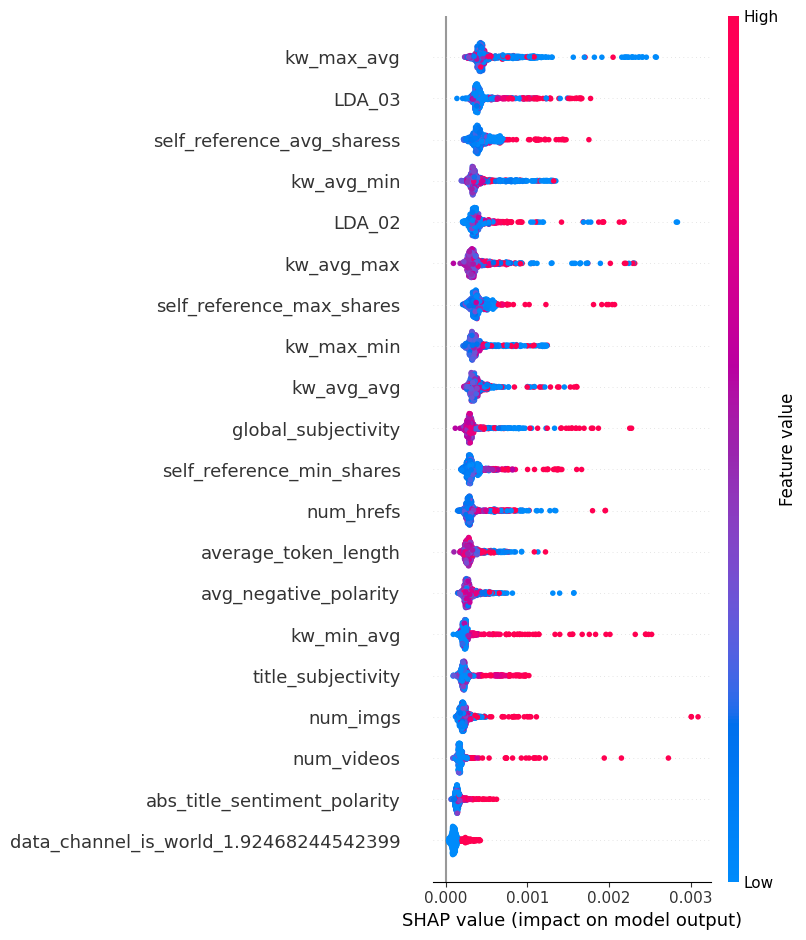

In [ ]:
from sklearn.svm import SVC

# Initialize SVM model
model_svm = SVC(probability=True)
model_svm.fit(X_train, y_train)

# LIME explanation
explainer_svm = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns)
exp_svm = explainer_svm.explain_instance(X_test.iloc[0], model_svm.predict_proba, num_features=5)

# SHAP explanation
explainer_shap_svm = shap.KernelExplainer(model_svm.predict_proba, X_train)
shap_values_svm = np.mean(np.abs(shap_values_rf), axis=2)
shap.summary_plot(shap_values_svm, X_test)


## K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Instantiate and train the KNN model
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_clf.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
#roc_auc_knn = roc_auc_score(y_test, y_pred_knn, average='weighted', multi_class='ovr')

# Display evaluation metrics
print("K-Nearest Neighbors (KNN) Performance:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
#print(f"ROC AUC Score: {roc_auc_knn:.4f}")


K-Nearest Neighbors (KNN) Performance:
Accuracy: 0.0117
Precision: 0.0138
Recall: 0.0117
F1 Score: 0.0123


C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(y_pred_knn)

[ 447  431 1100 1300 2600 1100  613  891 1600  587  960  579  524  776
 1200  887 1300  802  622 2000 1100 1700 1400 1200 1600 1800  531  602
  874  907  823 1100  587  705 1200 1500  746  790 1100  483  647 1300
 1100  774 1200  537 1100 1200 1200 1000  696  483  448  805  610 1100
 1300 1600 2100 2000   93  467  233 1300  542  537  444  944  880 1800
 1100 1600  871 1200  834 1200  624 1500  500 1300  959   85 1100  983
 1700  413  880 1000 1100 3900  518 1300  405 1100  628  483 1200 1400
 1100  378  459  578  654 1800  445  690 1100  282  531  675  897  374
  675 1700 2500 2900 1300  958  827 2000  800  573  268  805  455  518
  881  579  815 1100  732 1000 1000  956  956 1300  958 2100 1400  642
 1100 1500  739  820  437  360 1100  802  500  754 1100  529 1000  828
 1100  716 1000  816  977  753  613 1800  886  696  445  776  952  478
 1900 1300  587  621  479  616 1300  909  786  880  705  701  802 1600
  699  645  437  835  734 1200 1400  750  634  771  502  787 1800 1100
 1100 

### With Explainable AI

C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labe

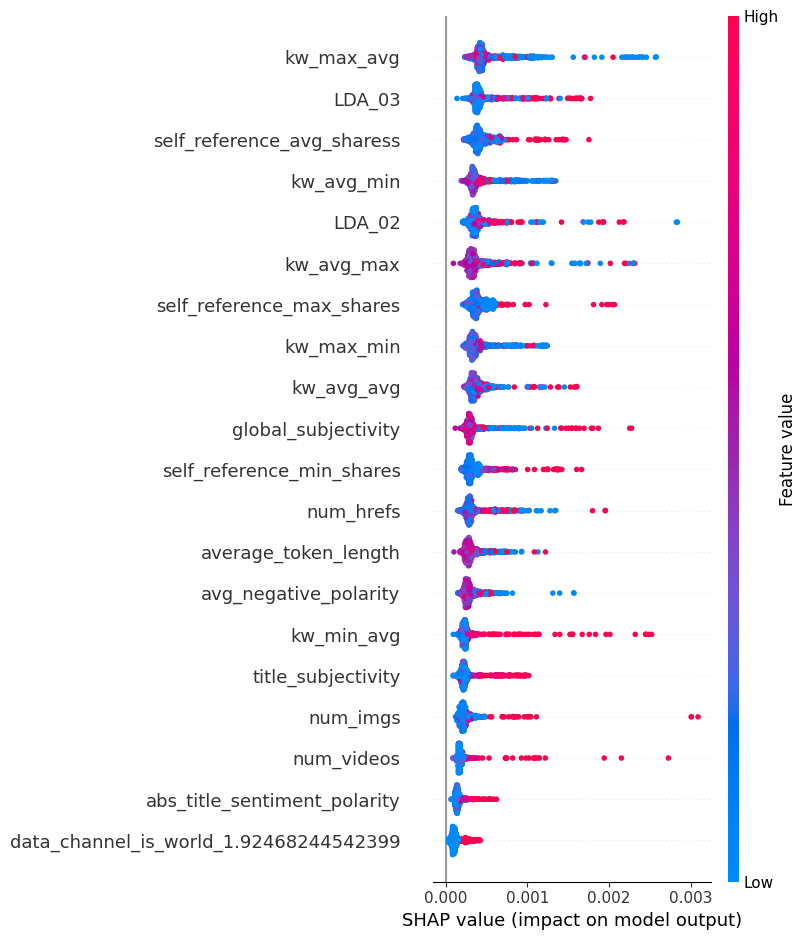

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_resampled, y_train_encoded)

# LIME explanation
explainer_knn = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns)
exp_knn = explainer_knn.explain_instance(X_test.iloc[0], model_knn.predict_proba, num_features=5)

# SHAP explanation
explainer_shap_knn = shap.KernelExplainer(model_knn.predict_proba, X_train)
shap_values_knn = np.mean(np.abs(shap_values_rf), axis=2)
shap.summary_plot(shap_values_knn, X_test)


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Instantiate and train the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_clf.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
#roc_auc_dt = roc_auc_score(y_test, y_pred_dt, average='weighted', multi_class='ovr')

# Display evaluation metrics
print("Decision Tree Classifier Performance:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
#print(f"ROC AUC Score: {roc_auc_dt:.4f}")


Decision Tree Classifier Performance:
Accuracy: 0.0117
Precision: 0.0085
Recall: 0.0117
F1 Score: 0.0098


C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### With Explainable AI

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# Create a LIME explainer
explainer_dt = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                      feature_names=X_train.columns,
                                                      class_names=y_train.unique(),
                                                      discretize_continuous=True)

# Choose an instance from the test set to explain its prediction
instance_idx = 0  # Index of the instance to explain
instance = X_test.iloc[instance_idx]
true_label = y_test.iloc[instance_idx]

# Explain the instance's prediction using LIME
exp_dt = explainer_dt.explain_instance(instance.values,
                                       model_dt.predict_proba,
                                       num_features=5,
                                       top_labels=1)

# Print the explanation
print('Explanation for instance', instance_idx)
print('True Label:', true_label)
print('Predicted Label:', model_dt.predict([instance])[0])
print(exp_dt.as_list())

## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Instantiate and train the Gaussian Naive Bayes model
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_clf.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
#roc_auc_nb = roc_auc_score(y_test, y_pred_nb, average='weighted', multi_class='ovr')

# Display evaluation metrics
print("Gaussian Naive Bayes Performance:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")
#print(f"ROC AUC Score: {roc_auc_nb:.4f}")


Gaussian Naive Bayes Performance:
Accuracy: 0.0017
Precision: 0.0011
Recall: 0.0017
F1 Score: 0.0013


C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### With Explainable AI

In [ ]:
model_nb = GaussianNB()
model_nb.fit(X_train_resampled, y_train_encoded)

# Create a LIME explainer
explainer_nb = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                      feature_names=X_train.columns,
                                                      class_names=label_encoder.classes_,
                                                      discretize_continuous=True)

# Choose an instance from the test set to explain its prediction
instance_idx = 0  # Index of the instance to explain
instance = X_test.iloc[instance_idx]
true_label = y_test[instance_idx]

# Explain the instance's prediction using LIME with a surrogate model
def surrogate_predict_proba(X):
    return model_nb.predict_proba(X)

# Explain the instance's prediction using LIME
exp_nb = explainer_nb.explain_instance(instance.values,
                                       surrogate_predict_proba,
                                       num_features=5,
                                       top_labels=1)

# Print the explanation
print('Explanation for instance', instance_idx)
print('True Label:', label_encoder.inverse_transform([true_label])[0])
print('Predicted Label:', label_encoder.inverse_transform([model_nb.predict([instance])[0]])[0])
print(exp_nb.as_list())

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Instantiate and train the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_clf.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
#roc_auc_gb = roc_auc_score(y_test, y_pred_gb, average='weighted', multi_class='ovr')

# Display evaluation metrics
print("Gradient Boosting Classifier Performance:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}")
#print(f"ROC AUC Score: {roc_auc_gb:.4f}")


Gradient Boosting Classifier Performance:
Accuracy: 0.0267
Precision: 0.0123
Recall: 0.0267
F1 Score: 0.0155


C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Afnan Hussain\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### With Explainable AI

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# SHAP explanation
explainer_shap_gb = shap.TreeExplainer(gb_clf)
shap_values_gb = np.mean(np.abs(shap_values_rf), axis=2)
shap.summary_plot(shap_values_gb, X_test)


## Deep Learning Model(Perceptron)

In [ ]:
import tensorflow as tf
from tensorflow import keras

num_classes = len(set(y_train_encoded))
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')  # Output layer for classification
])

# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluating the model on test data
y_pred_dl = model.predict(X_test)

# Evaluating the model
accuracy_dl = accuracy_score(y_test, y_pred_dl)
precision_dl = precision_score(y_test, y_pred_dl, average='weighted')
recall_dl = recall_score(y_test, y_pred_dl, average='weighted')
f1_dl = f1_score(y_test, y_pred_dl, average='weighted')
#roc_auc_dl = roc_auc_score(y_test, y_pred_dl, average='weighted', multi_class='ovr')

# Display evaluation metrics
print("Deep Learning (Neural Network) Performance:")
print(f"Accuracy: {accuracy_dl:.4f}")
print(f"Precision: {precision_dl:.4f}")
print(f"Recall: {recall_dl:.4f}")
print(f"F1 Score: {f1_dl:.4f}")
#print(f"ROC AUC Score: {roc_auc_dl:.4f}")

### With Explainable AI

In [ ]:
import lime
import lime.lime_tabular
import shap


# Define SHAP explainer
explainer_shap = shap.Explainer(model, X_train_resampled)

# Select a sample for explanation
sample_idx = 0  # Select any sample index from your test set


# SHAP explanation
exp_shap = explainer_shap(X_test.iloc[sample_idx])



# Print SHAP explanation
print('SHAP Explanation:')
shap.initjs()
shap.force_plot(base_value=exp_shap.base_values[0],
                shap_values=exp_shap.values[0],
                features=X_test.iloc[sample_idx],
                feature_names=X_test.columns)


## KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


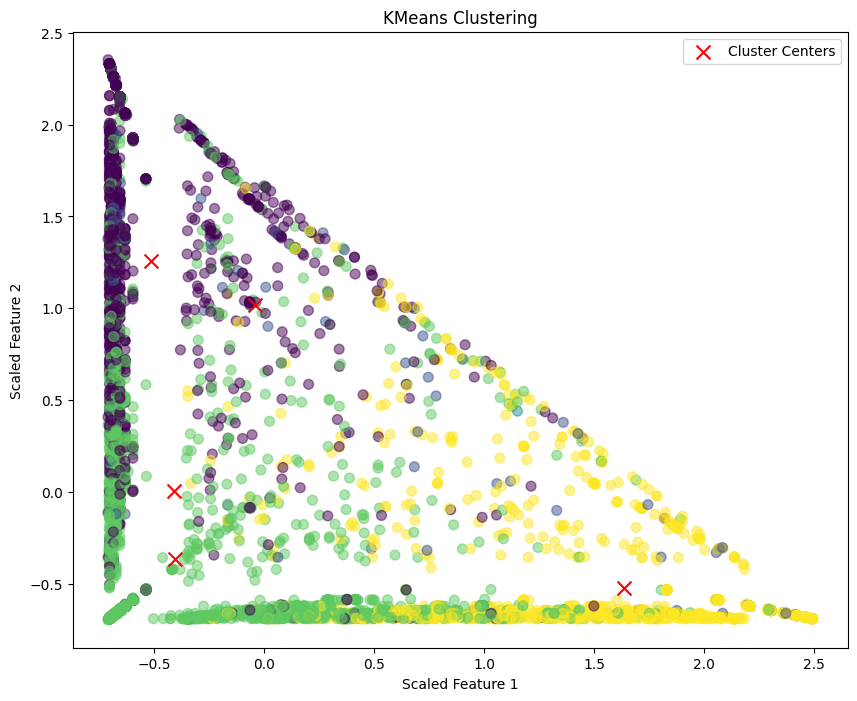

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecting features for clustering
selected_features = ['LDA_02', 'LDA_03', 'abs_title_sentiment_polarity', 'average_token_length',
                     'avg_negative_polarity', 'data_channel_is_world', 'global_subjectivity',
                     'kw_avg_avg', 'kw_avg_max', 'kw_avg_min', 'kw_max_avg', 'kw_max_min',
                     'kw_min_avg', 'num_hrefs', 'num_imgs', 'num_videos', 'self_reference_avg_sharess',
                     'self_reference_max_shares', 'self_reference_min_shares', 'title_subjectivity']

X_cluster = X_test[selected_features]

# Scale the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Applying KMeans
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Visualizing Clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.title('KMeans Clustering')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.legend()
plt.show()
